# アルゴリズム 4.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch import autograd
import torchvision

In [2]:
np.random.seed(0)
torch.manual_seed(0)

In [3]:
dataset = torchvision.datasets.MNIST(root='/tmp/', download=True)

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, input):
        return self.main(input)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(64, 1),
        )

    def forward(self, input):
        return self.main(input)

In [6]:
generator = Generator()
discriminator = Discriminator()

optimizer_generator = optim.Adam(generator.parameters(), lr=0.001)
optimizer_discriminator = optim.Adam(discriminator.parameters(), lr=0.001)

lam = 10

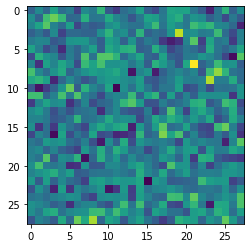

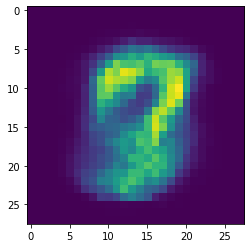

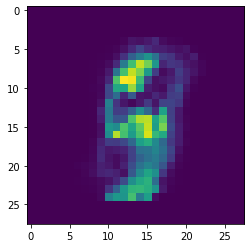

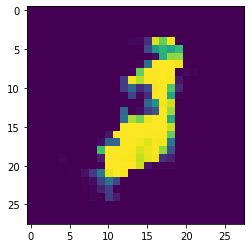

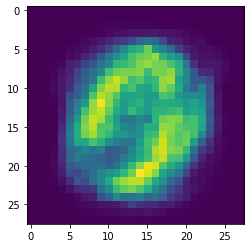

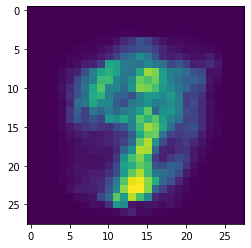

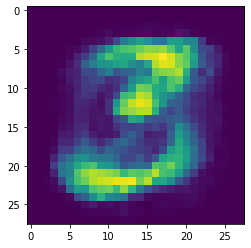

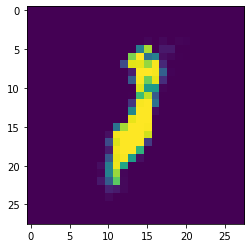

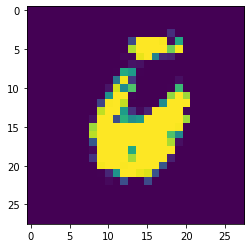

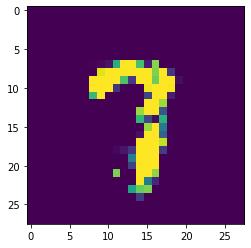

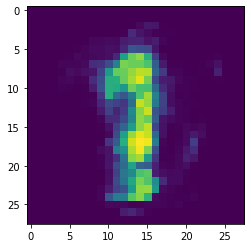

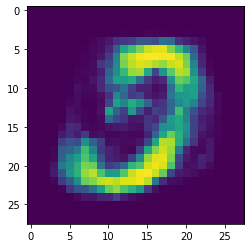

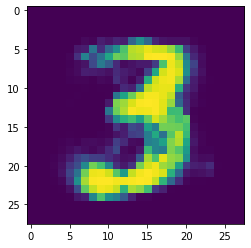

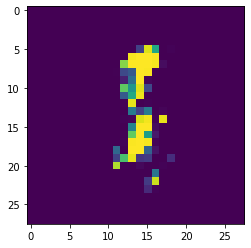

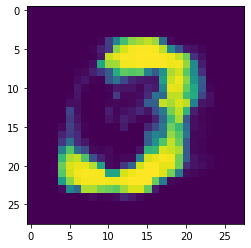

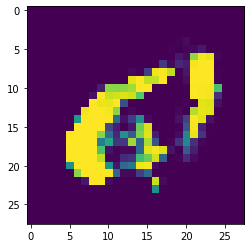

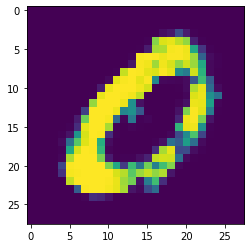

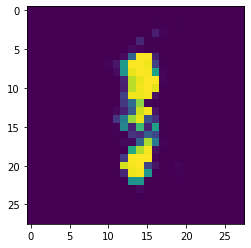

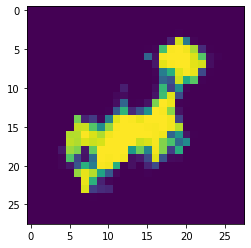

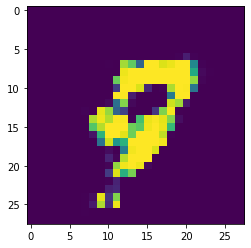

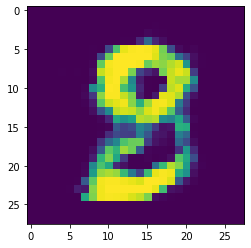

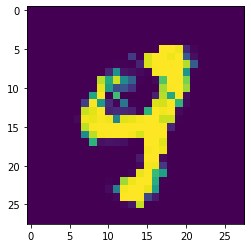

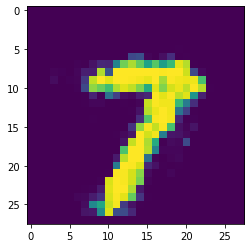

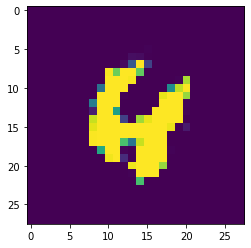

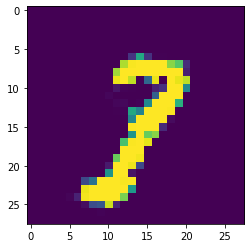

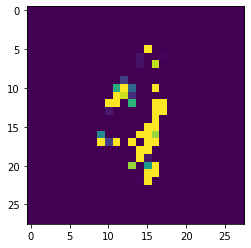

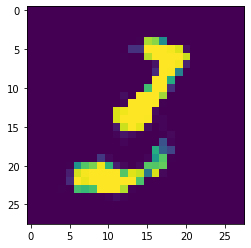

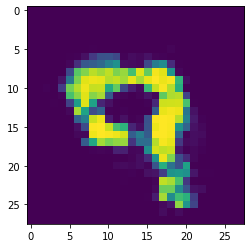

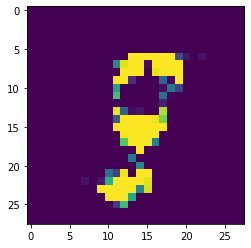

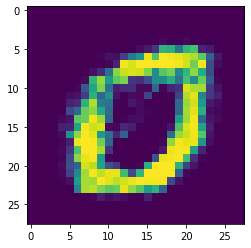

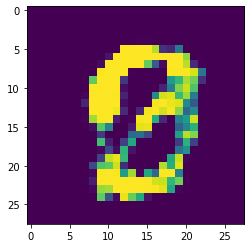

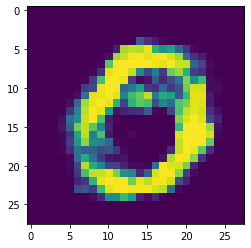

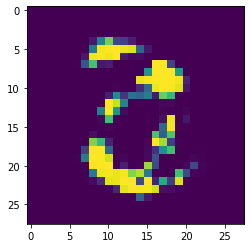

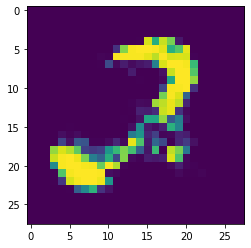

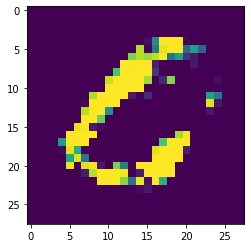

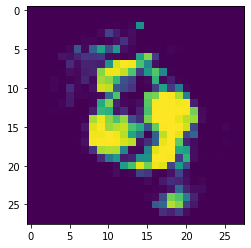

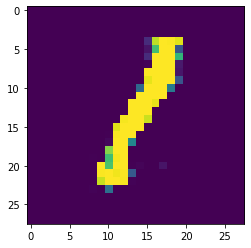

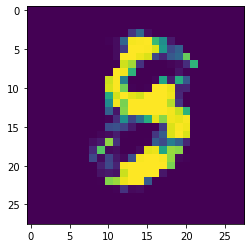

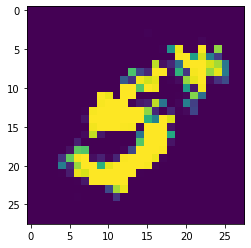

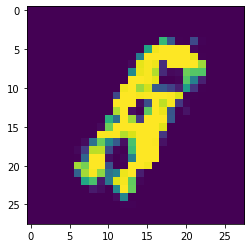

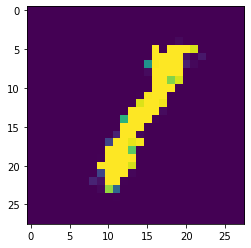

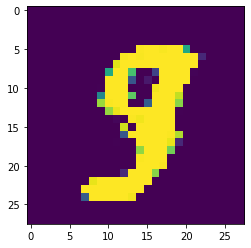

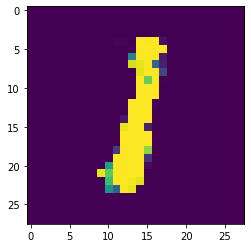

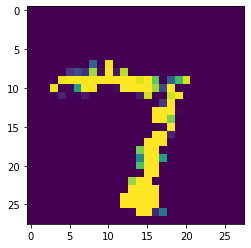

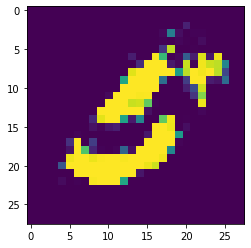

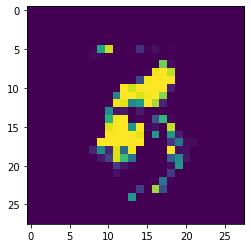

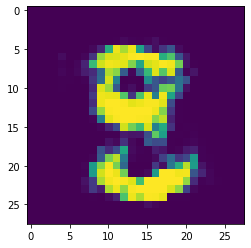

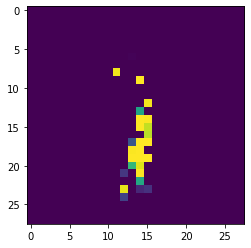

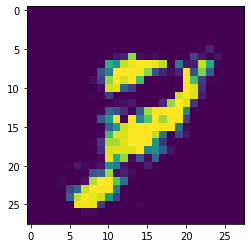

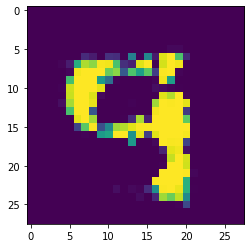

In [7]:
# アルゴリズム 4.4
for i in range(10000):
    for j in range(16):
        x = torchvision.transforms.functional.to_tensor(dataset[np.random.randint(len(dataset))][0]).reshape(1, -1)
        z = torch.randn(1, 128)
        x_hat = generator(z)

        t = torch.rand(1)
        x_tilde = t * x + (1 - t) * x_hat
        x_tilde_out = discriminator(x_tilde)

        grad = autograd.grad(outputs=x_tilde_out, inputs=x_tilde,
                            grad_outputs=torch.ones(x_tilde_out.shape),
                            create_graph=True, retain_graph=True)[0]

        loss = - discriminator(x) + discriminator(x_hat) + lam * ((grad.norm() - 1) ** 2)

        optimizer_discriminator.zero_grad()
        loss.backward()
        optimizer_discriminator.step()

    z = torch.randn(1, 128)
    x_hat = generator(z)
    loss = - discriminator(x_hat)
    optimizer_generator.zero_grad()
    loss.backward()
    optimizer_generator.step()
    if i % 200 == 0:
        plt.clf()
        plt.imshow(x_hat.detach().numpy().reshape(28, 28))
        plt.show()